<a href="https://colab.research.google.com/github/Frany-oss/Titanic-Kaggle-DataScience/blob/main/Who_Will_Survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Who will survive the Titanic?

### About the project / Dataset

### Dependencies

In [141]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [73]:
train = pd.read_csv('/content/Titanic-Kaggle-DataScience/train.csv')
test = pd.read_csv('/content/Titanic-Kaggle-DataScience/test.csv')
gender_submission = pd.read_csv('/content/Titanic-Kaggle-DataScience/gender_submission.csv')

In [74]:
# Preview the train data
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [75]:
# preview the test data
test.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [76]:
# View Example of submissions
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

#### Data Dictionary (extracted from Kaggle)


* **survival:** 0 = No, 1 = Yes
* **pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd 
* **sex**
* **Age**
* **sibsp:** # of siblings / spouses aboard the Titanic
* **parch:** # of parents / children aboard the Titanic
* **ticket:** Ticket number
* **fare:** Passenger fare
* **cabin:** Cabin number
* **embarked (Port of Embarkation):** C = Cherbourg, Q = Queenstown, S = Southampton



### Exploratory Data Analysis

In [77]:
# See the description of the data to analize each variable
train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

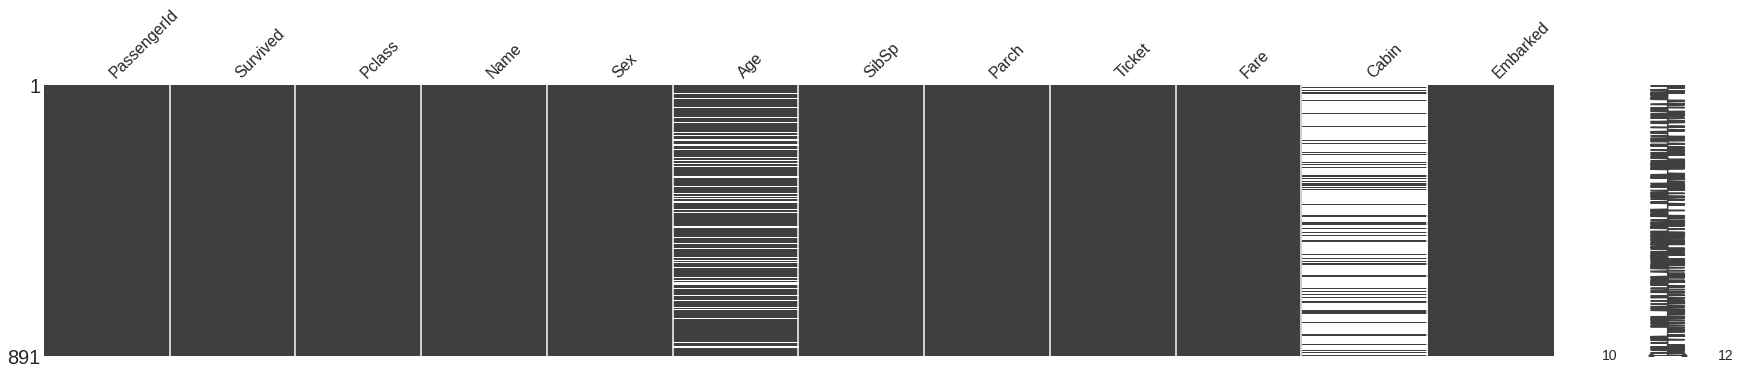

In [78]:
# Analyzing if we have any missing values in our dataset (the white spaces are the missing values)
missingno.matrix(train, figsize=(30, 5))

In [79]:
# All the missing values (or null)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
# Creating two different dataFrames. One for the categories and another for continous variables
df_cat = pd.DataFrame() # category
df_con = pd.DataFrame() # contious

In [81]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Analyzing each variable

### Feature: Survived

0 = did not survive, 1 = survived

0    549
1    342
Name: Survived, dtype: int64


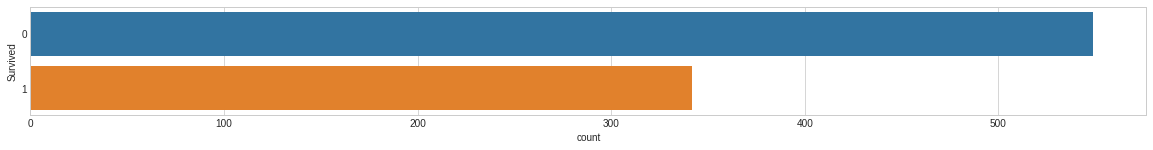

In [82]:
# how many people survived?
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived', data = train)
print(train.Survived.value_counts())

In [83]:
# Add this variable to our two dataFrames
df_cat['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

### Feature: PClass
1 = 1st, 2 = 2nd, 3 = 3rd


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


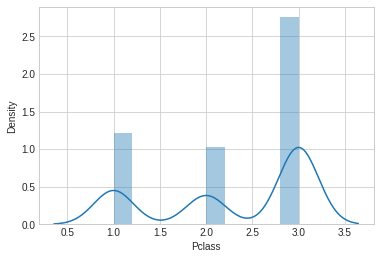

In [84]:
# Distribution of each class
sns.distplot(train.Pclass)

In [85]:
# Add this variable to our two dataFrames
df_cat['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name

In [ ]:
train.Name.value_counts()[:20]

Nicholls, Mr. Joseph Charles                                         1
Andersson, Miss. Ellis Anna Maria                                    1
Mellinger, Mrs. (Elizabeth Anne Maidment)                            1
Hold, Mr. Stephen                                                    1
Newell, Miss. Madeleine                                              1
Davis, Miss. Mary                                                    1
Reeves, Mr. David                                                    1
Mionoff, Mr. Stoytcho                                                1
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")    1
Carrau, Mr. Francisco M                                              1
Christmann, Mr. Emil                                                 1
Salkjelsvik, Miss. Anna Kristine                                     1
Novel, Mr. Mansouer                                                  1
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")                     1
Gavey,

### Feature: Sex

male      577
female    314
Name: Sex, dtype: int64


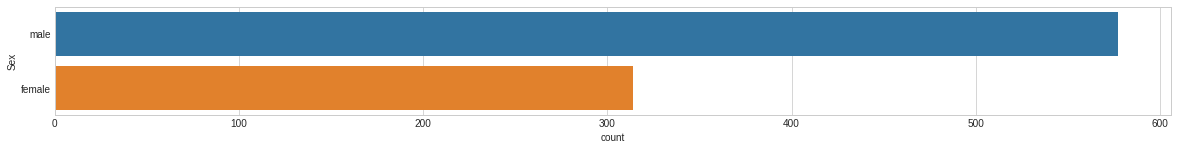

In [86]:
# distribution of sex
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Sex', data = train)
print(train.Sex.value_counts())

In [87]:
# Add to the Sex category
df_cat['Sex'] = train['Sex']
# if is female = 1, male = 0
df_cat['Sex'] = np.where(df_cat['Sex'] == 'female', 1, 0)

df_con['Sex'] = train['Sex']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


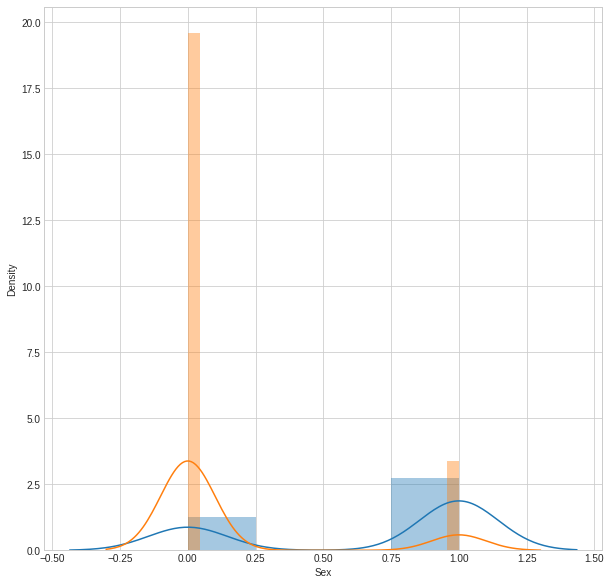

In [88]:
# How does the Sex variable look compare to Survival?
fig = plt.figure(figsize = (10, 10))
sns.distplot(df_cat.loc[df_cat['Survived'] == 1]['Sex'], kde_kws={'Label': 'Survived'})
sns.distplot(df_cat.loc[df_cat['Survived'] == 0]['Sex'], kde_kws={'Label': 'Did not Survived'})

In [89]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: Age

In [90]:
# FIX UP THE MISSING VALUES OF THE FEATURE AGE
train.Age.isnull().sum()

177

### Feature: SibSp
Number of siblings / spouses aboard the Titanic

In [91]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [92]:
df_cat['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


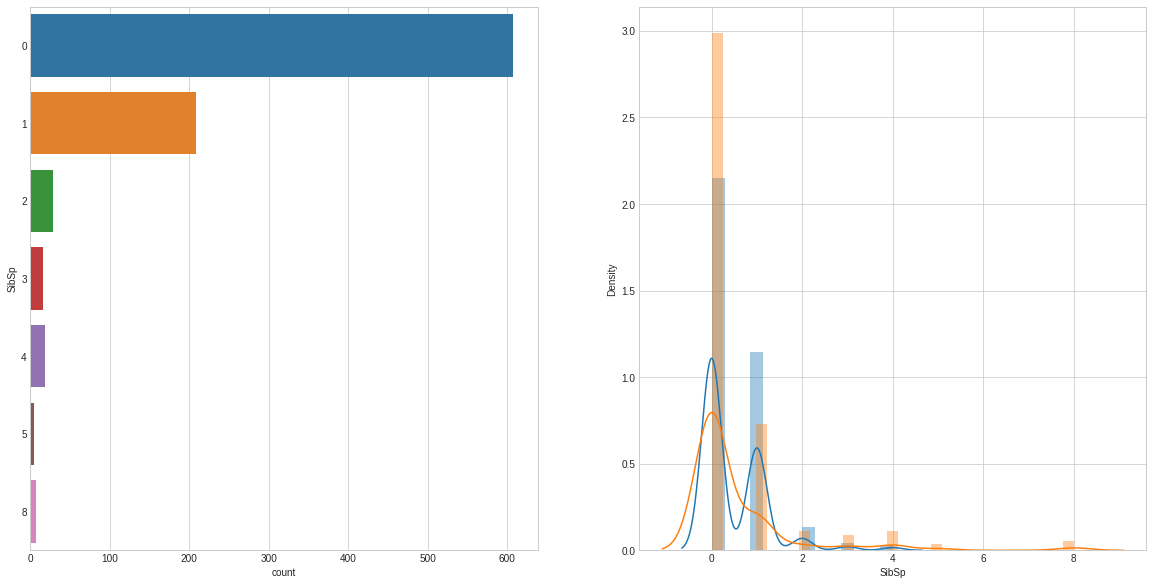

In [93]:
# Visualise the counts of SibSp and the distribution of the values
plot_count_dist(train, bin_df=df_cat, label_column='Survived', target_column='SibSp', figsize=(20, 10))

### Feature: Parch
Number of parents / children aboard the Titanic

In [ ]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [94]:
# Add Parch to subset dataframes
df_cat['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


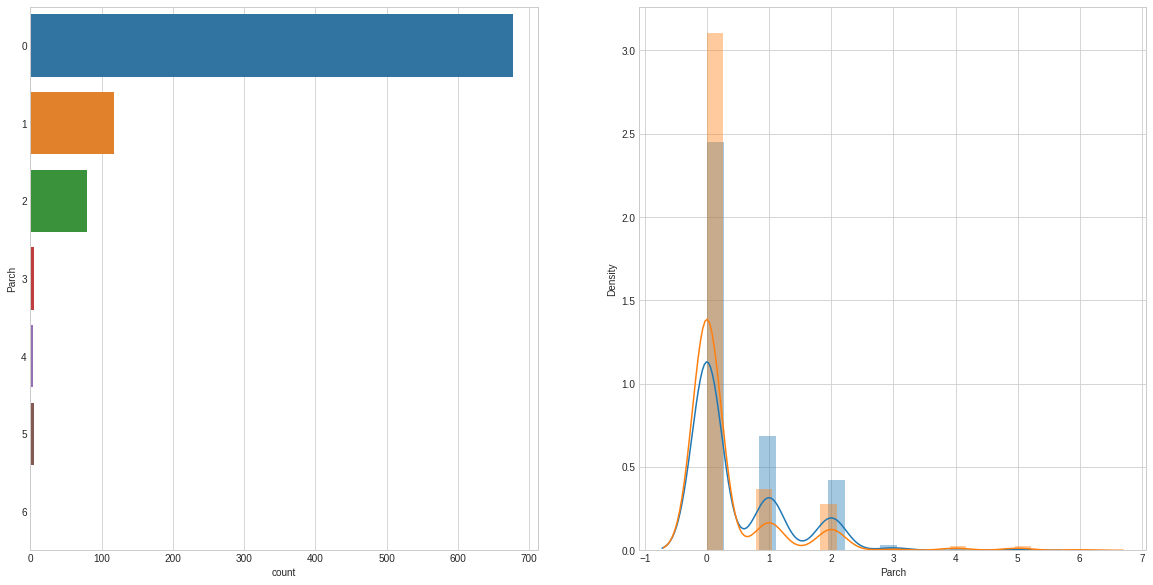

In [ ]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, bin_df=df_cat, label_column='Survived', target_column='Parch', figsize=(20, 10))

In [ ]:
df_con.head()

Survived     Sex  SibSp  Parch
0         0    male      1      0
1         1  female      1      0
2         1  female      0      0
3         1  female      1      0
4         0    male      0      0

### Feature: Ticket

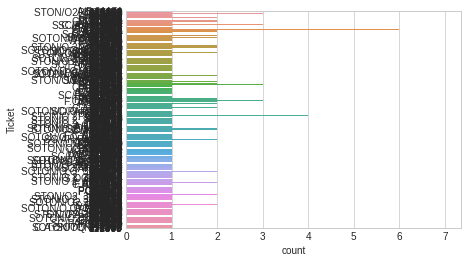

In [95]:
sns.countplot(y="Ticket", data=train)

In [ ]:
train.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
347088      6
CA 2144     6
           ..
349910      1
112052      1
250653      1
349208      1
A/5 3536    1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


In [ ]:
# TODO: How could you reduce the Ticket feature? Is it even possible?
# It may be similar to what you could do with Name.

### Feature Fare


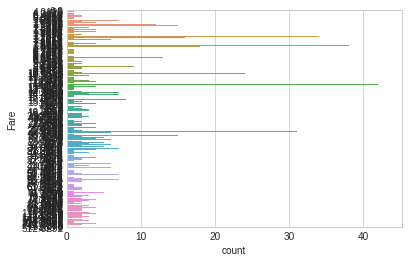

In [ ]:
sns.countplot(y = 'Fare', data = train)

In [ ]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [96]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare']
df_cat['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [98]:
# What do our Fare bins look like?
df_cat.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


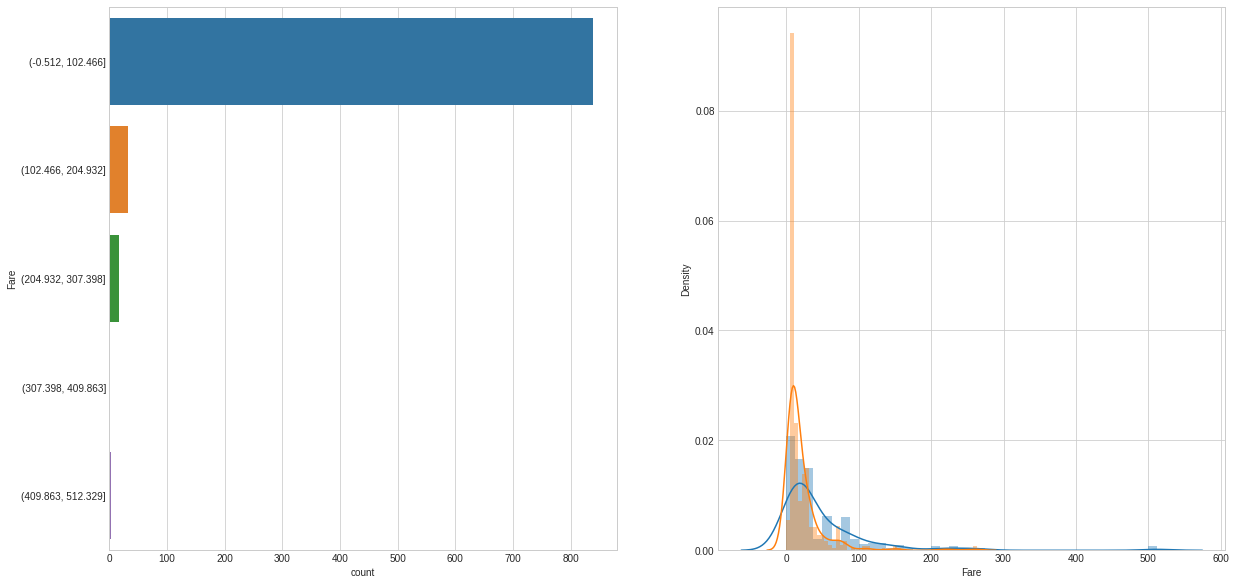

In [99]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train, bin_df=df_cat, label_column='Survived', target_column='Fare', figsize=(20,10), use_bin_df=True)

### Feature: Cabin



Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?


### Feature: Embarcked
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [113]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

(891,)

In [117]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

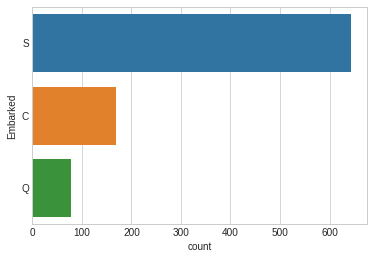

In [107]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train)

In [109]:
# Add Embarked to sub dataframes
df_cat['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [112]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_cat = df_cat.dropna(subset=['Embarked'])
print(len(df_con))

889
889


## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe `(df_cat)` with one-hot encoding and our continuous dataframe `(df_con)` as well.

In [114]:
df_cat.head()

Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 102.466]        S
1         1       1    1      1      0  (-0.512, 102.466]        C
2         1       3    1      0      0  (-0.512, 102.466]        S
3         1       1    1      1      0  (-0.512, 102.466]        S
4         0       3    0      0      0  (-0.512, 102.466]        S

In [115]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
0         0       3    male      1      0   7.2500        S
1         1       1  female      1      0  71.2833        C
2         1       3  female      0      0   7.9250        S
3         1       1  female      1      0  53.1000        S
4         0       3    male      0      0   8.0500        S

In [126]:
# One-hot encode binned variables
one_hot_cols = df_cat.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_cat, columns=one_hot_cols)

df_bin_enc.head()

Survived  Pclass_1  Pclass_2  ...  Embarked_C  Embarked_Q  Embarked_S
0         0         0         0  ...           0           0           1
1         1         1         0  ...           1           0           0
2         1         0         0  ...           0           0           1
3         1         1         0  ...           0           0           1
4         0         0         0  ...           0           0           1

[5 rows x 28 columns]

In [127]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [128]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [129]:
df_con_enc.head(20)

Survived  SibSp  Parch     Fare  ...  sex_male  pclass_1  pclass_2  pclass_3
0          0      1      0   7.2500  ...         1         0         0         1
1          1      1      0  71.2833  ...         0         1         0         0
2          1      0      0   7.9250  ...         0         0         0         1
3          1      1      0  53.1000  ...         0         1         0         0
4          0      0      0   8.0500  ...         1         0         0         1
5          0      0      0   8.4583  ...         1         0         0         1
6          0      0      0  51.8625  ...         1         1         0         0
7          0      3      1  21.0750  ...         1         0         0         1
8          1      0      2  11.1333  ...         0         0         0         1
9          1      1      0  30.0708  ...         0         0         1         0
10         1      1      1  16.7000  ...         0         0         0         1
11         1      0      0  26.5500  ...         0         1         0         0
12         0      0      0   8.0500  ...         1         0         0         1
13         0      1      5  31.2750  ...         1         0         0         1
14         0      0      0   7.8542  ...         0         0         0         1
15         1      0      0  16.0000  ...         0         0         1         0
16         0      4      1  29.1250  ...         1         0         0         1
17         1      0      0  13.0000  ...         1         0         1         0
18         0      1      0  18.0000  ...         0         0         0         1
19         1      0      0   7.2250  ...         0         0         0         1

[20 rows x 12 columns]

## Building Machine Learning Models

Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [130]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [131]:
selected_df.head()

Survived  SibSp  Parch     Fare  ...  sex_male  pclass_1  pclass_2  pclass_3
0         0      1      0   7.2500  ...         1         0         0         1
1         1      1      0  71.2833  ...         0         1         0         0
2         1      0      0   7.9250  ...         0         0         0         1
3         1      1      0  53.1000  ...         0         1         0         0
4         0      0      0   8.0500  ...         1         0         0         1

[5 rows x 12 columns]

In [132]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [136]:
# Shape of the data (without labels)
X_train.head(3)

SibSp  Parch     Fare  embarked_C  ...  sex_male  pclass_1  pclass_2  pclass_3
0      1      0   7.2500           0  ...         1         0         0         1
1      1      0  71.2833           1  ...         0         1         0         0
2      0      0   7.9250           0  ...         0         0         0         1

[3 rows x 11 columns]

In [137]:
# Shape of the labels
y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

### Define a function to fit machine learning algorithms

In [135]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regresion

In [142]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:00.408213


### K-Nearest Neighbours

In [143]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.164791


### Gaussian Naive Bayes

In [144]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.073250


### Linear Support Vector Machines (SVM)

In [145]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 75.14
Accuracy CV 10-Fold: 75.14
Running Time: 0:00:00.436962


### Stochastic Gradient Descent

In [146]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 77.5
Accuracy CV 10-Fold: 68.84
Running Time: 0:00:00.129517


### Decision Tree Classifier

In [147]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.43
Running Time: 0:00:00.103489


### Gradient Boost Trees

In [148]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.049028


### CatBoost Algorithm

In [149]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [150]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [151]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6862830	total: 56.6ms	remaining: 56.5s
1:	learn: 0.6809444	total: 58.9ms	remaining: 29.4s
2:	learn: 0.6751692	total: 62.1ms	remaining: 20.6s
3:	learn: 0.6689060	total: 65ms	remaining: 16.2s
4:	learn: 0.6632144	total: 68.8ms	remaining: 13.7s
5:	learn: 0.6576488	total: 72.1ms	remaining: 11.9s
6:	learn: 0.6544441	total: 73.3ms	remaining: 10.4s
7:	learn: 0.6490635	total: 76.6ms	remaining: 9.5s
8:	learn: 0.6443241	total: 80.9ms	remaining: 8.91s
9:	learn: 0.6395935	total: 83.8ms	remaining: 8.29s
10:	learn: 0.6345186	total: 92ms	remaining: 8.27s
11:	learn: 0.6305316	total: 102ms	remaining: 8.39s
12:	learn: 0.6275610	total: 104ms	remaining: 7.92s
13:	learn: 0.6225020	total: 109ms	remaining: 7.67s
14:	learn: 0.6179503	total: 113ms	remaining: 7.44s
15:	learn: 0.6140480	total: 115ms	remaining: 7.1s
16:	learn: 0.6100034	total: 119ms	remaining: 6.87s
17:	learn: 0.6049646	total: 124ms	remaining: 6.74s
18:	learn: 0.6025760	total: 125ms	remaining: 6.46s
19:	learn: 0.5998630	total: 127ms	re

#### Perform CatBoost cross-validation

In [152]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 340ms	remaining: 5m 39s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 621ms	remaining: 5m 10s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 902ms	remaining: 4m 59s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 1.19s	remaining: 4m 55s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 1.45s	remaining: 4m 48s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 1.71s	remaining: 4m 44s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 2s	remaining: 4m 44s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 2.31s	remaining: 4m 46s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 2.58s	remaining: 4m 44s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 2.86s	remaining: 4m 43s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 3.15s	remaining: 4m 43s
11:	learn: 0.5447302	test: 0.5517930	best: 0